## Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.


### Dataset

In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

Here's a wget-able [link](https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv):

```bash
wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
```

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column `'JAMB_Score'`).


In [3]:
url = "https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv"

### Preparing the dataset 

First, let's make the names lowercase:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Preparation:

* Remove the `student_id` column.
* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [84]:
# Import the necessary dependency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, export_text

In [9]:
df = pd.read_csv(url)

In [10]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [12]:
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [13]:
df.shape

(5000, 17)

In [15]:
# remove the student_id column
df.drop(columns='student_id', inplace=True)

In [21]:
# Check for missing values
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [23]:
# fill missing values with 0
df.fillna(0, inplace=True)

In [29]:
X = df.drop(columns='jamb_score')
y = df.jamb_score.values

In [ ]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=1)

In [39]:
dv = DictVectorizer(sparse=True)

X_train_dict = X_train.to_dict(orient='records')
X_train_trans = dv.fit_transform(X_train_dict)

X_val_dict = X_val.to_dict(orient='records')
X_val_trans = dv.transform(X_val_dict)

## Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `study_hours_per_week`
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`



In [47]:
dt = DecisionTreeRegressor(max_depth=1)

dt.fit(X_train_trans, y_train)

DecisionTreeRegressor(max_depth=1)

In [48]:
print(export_text(dt, feature_names=(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



**Ans to question 1: study_hours_per_week**

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 22.13
* 42.13
* 62.13
* 82.12

In [53]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=1)

model = rf.fit(X_train_trans, y_train)

In [54]:
y_pred = model.predict(X_val_trans)

In [58]:
root_mean_squared_error(y_val, y_pred)

42.13724207871227

**Ans to question 2 is 42.13**

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

In [59]:
scores = {}

In [60]:
for n in range(10, 200, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=1)
    model = rf.fit(X_train_trans, y_train)
    y_pred = model.predict(X_val_trans)
    rmse = root_mean_squared_error(y_val, y_pred)
    scores[n] = rmse

In [61]:
scores

{10: 42.13724207871227,
 20: 41.46121464694444,
 30: 41.106170947924596,
 40: 40.917193933296545,
 50: 40.852278663496854,
 60: 40.78428140159447,
 70: 40.677098222414024,
 80: 40.53933283129176,
 90: 40.50434592594835,
 100: 40.51680451861919,
 110: 40.59335280539747,
 120: 40.6248503681005,
 130: 40.650840905587195,
 140: 40.5948515491302,
 150: 40.596715029667116,
 160: 40.60350763548252,
 170: 40.62754627591216,
 180: 40.641313925139386,
 190: 40.63135509073867}

**Ans to question 3: 80**

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [65]:
scores_2 = []

In [67]:
for d in [10, 15, 20, 25]:
    for n in range(10, 200, 10):
        rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=1, max_depth=d)
        model = rf.fit(X_train_trans, y_train)
        y_pred = model.predict(X_val_trans)
        rmse = root_mean_squared_error(y_val, y_pred)
        scores_2.append((d, n, rmse))
        score_df = pd.DataFrame(scores_2, columns=['max_depth', 'n_estimator', 'rmse'])

In [68]:
score_df

,max_depth,n_estimator,rmse
0,10,10,41.258349
1,10,10,41.258349
2,10,20,40.880528
3,10,30,40.624956
4,10,40,40.270069
...,...,...,...
72,25,150,40.593185
73,25,160,40.600208
74,25,170,40.624371
75,25,180,40.638564


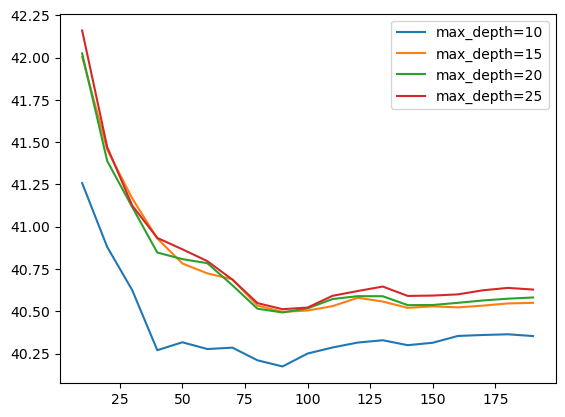

In [73]:
for d in [10, 15, 20, 25]:
    df_subset = score_df[score_df.max_depth == d]
    plt.plot(df_subset.n_estimator, df_subset.rmse, label=f'max_depth={d}')

plt.legend();

**Ans to question 4: 10**

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`

In [74]:
rf_new = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=1, max_depth=20)

model_new = rf_new.fit(X_train_trans, y_train)

In [80]:
feature_importances = list(zip(model.feature_importances_, (dv.get_feature_names_out())))

In [83]:
sorted_importances = sorted(feature_importances, key=lambda x: x[0], reverse=True)
sorted_importances[0]

(0.24631503676945524, 'study_hours_per_week')

**Ans to question 5: study_hours_per_week**

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```python
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [132]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [133]:
scores_xgb = {}

In [134]:
features = list(dv.get_feature_names_out())

In [135]:
dtrain = xgb.DMatrix(X_train_trans, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val_trans,label=y_val, feature_names=features)

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [140]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

xgb.train(
    xgb_params, dtrain, evals=watchlist, num_boost_round=100
)

In [141]:
df_score = parse_xgb_output(output)

In [142]:
key = f"eta={xgb_params['eta']}"
scores_xgb[key] = parse_xgb_output(output)
key

'eta=0.3'

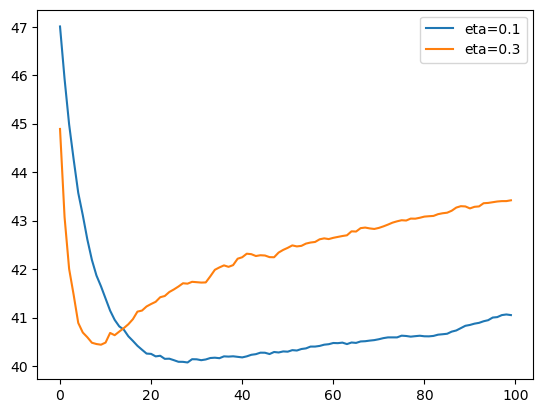

In [143]:
for key, df_score in scores_xgb.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=key)
plt.legend();

**Ans to question 6: 0.1**